#  Clustering Resting-State Functional MRI
To create a set of parcles from resting-state functional MRI using Ward clustering 

# Step 1: Import Modules

In [1]:
# import some modules
import numpy as np

# for fetching and loading fMRI data
from nilearn import datasets
from nilearn import input_data

# for clustering 
from sklearn.feature_extraction import image
from sklearn.cluster import FeatureAgglomeration

# for plotting
from nilearn.plotting import plot_roi, plot_epi, show
from nilearn.image import mean_img

# display plots in Jupyter notebook
%matplotlib inline

# Step 2: Loading Data

In [2]:
# load the all nyu resting-stage fMRI data from public source (http://www.nitrc.org/frs/?group_id=274)
# the dataset includes 3 sessions of 26 subjects (male/female: 11/15). Three sets of images are available for each session
# 1. Anatomic and functional images are available
# for each subject, 3 resting-state scans with 197 EPI 3D volumes (matrix: 64*64*29, resolution = 3 mm isotropic)
nyu_dataset = datasets.fetch_nyu_rest(n_subjects=25)

# select a single subject to analyze
subject_id = 10

# Step 3: Masking

In [3]:
# need to mask the original data using stategy mask_stategy = 'epi'
nifti_masker = input_data.NiftiMasker(memory='nilearn_cache',
                                      mask_strategy='epi', memory_level=1,
                                      standardize=False)

# select a subject for analysis
func_filename = nyu_dataset.func[subject_id]

# create masked fMRI data
fmri_masked = nifti_masker.fit_transform(func_filename)
mask = nifti_masker.mask_img_.get_data().astype(np.bool)

# Step 4: Clustering

In [4]:
# set connectivity
shape = mask.shape
connectivity = image.grid_to_graph(n_x=shape[0], n_y=shape[1],
                                   n_z=shape[2], mask=mask)


# Agglomerative clustering (n_clusters = 50)
ward_50 = FeatureAgglomeration(n_clusters=50, connectivity=connectivity,
                            linkage='ward', memory='nilearn_cache')
ward_50.fit(fmri_masked)

# Agglomerative clustering (n_clusters = 500)
ward_500 = FeatureAgglomeration(n_clusters=500, connectivity=connectivity,
                            linkage='ward', memory='nilearn_cache')
ward_500.fit(fmri_masked)

# Agglomerative clustering (n_clusters = 5000)
ward_5000 = FeatureAgglomeration(n_clusters=5000, connectivity=connectivity,
                            linkage='ward', memory='nilearn_cache')
ward_5000.fit(fmri_masked)


FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
           connectivity=<48320x48320 sparse matrix of type '<type 'numpy.int32'>'
	with 326994 stored elements in COOrdinate format>,
           linkage='ward', memory='nilearn_cache', n_clusters=5000,
           n_components=None,
           pooling_func=<function mean at 0x0000000003F71748>)

# Step 5: Results and Visualization

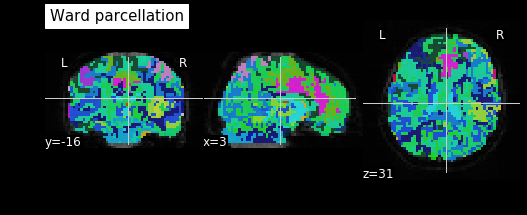

In [5]:
# Unmask data for visualization
# remove label 0 by adding 1
labels = ward_50.labels_ + 1

# inverse transform
labels_img = nifti_masker.inverse_transform(labels)

mean_func_img = mean_img(func_filename)

# common cut coordinates for all plots
first_plot = plot_roi(labels_img, mean_func_img, title="Ward parcellation",
                      display_mode='ortho')

# save labels_img to local disk
labels_img.to_filename('parcellation.nii')

show()


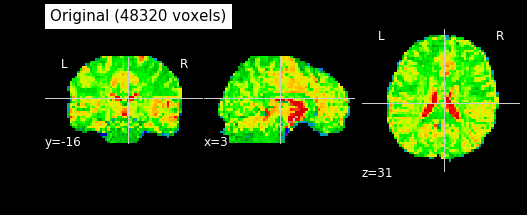

In [6]:
# Display the original data
plot_epi(nifti_masker.inverse_transform(fmri_masked[0]),
         cut_coords=first_plot.cut_coords,
         title='Original (%i voxels)' % fmri_masked.shape[1],
         display_mode='ortho')

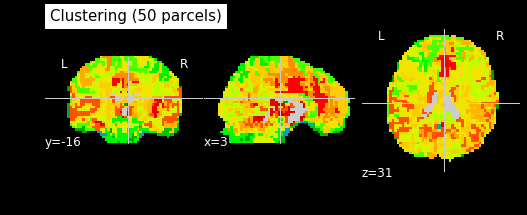

In [7]:
# visualization with number of clusters = 100

# reduce dimensions
fmri_reduced_50 = ward_50.transform(fmri_masked)

# Display the corresponding data compressed using the parcellation
fmri_compressed_50 = ward_50.inverse_transform(fmri_reduced_50)

# inverse transform
compressed_img_50 = nifti_masker.inverse_transform(fmri_compressed_50[0])

# Display the compressed data
plot_epi(compressed_img_50, cut_coords=first_plot.cut_coords,
         title='Clustering (50 parcels)',
         display_mode='ortho')

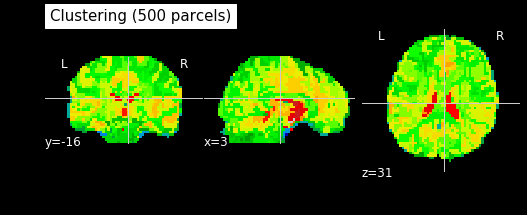

In [8]:
# visualization with number of clusters = 500
# reduce dimensions
fmri_reduced_500 = ward_500.transform(fmri_masked)

# Display the corresponding data compressed using the parcellation
fmri_compressed_500 = ward_500.inverse_transform(fmri_reduced_500)

# inverse transform
compressed_img_500 = nifti_masker.inverse_transform(fmri_compressed_500[0])

# Display the compressed data
plot_epi(compressed_img_500, cut_coords=first_plot.cut_coords,
         title='Clustering (500 parcels)',
         display_mode='ortho')
show()

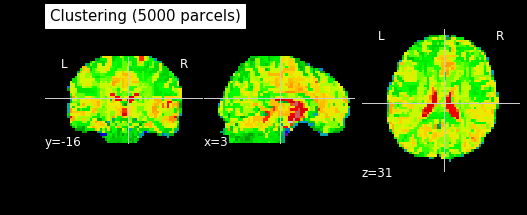

In [9]:
# visualization with number of clusters = 2000

# reduce dimensions
fmri_reduced_5000 = ward_5000.transform(fmri_masked)

# Display the corresponding data compressed using the parcellation
fmri_compressed_5000 = ward_5000.inverse_transform(fmri_reduced_5000)

# inverse transform
compressed_img_5000 = nifti_masker.inverse_transform(fmri_compressed_5000[0])

# Display the compressed data
plot_epi(compressed_img_5000, cut_coords=first_plot.cut_coords,
         title='Clustering (5000 parcels)',
         display_mode='ortho')
show()